# The San Francisco Crime Dataset

In [3]:
# load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kprototypes import KPrototypes
from collections import Counter
import scipy.stats as st
from collections import OrderedDict
from scipy.stats import gaussian_kde
from collections import defaultdict
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [4]:
# load data
df_data = pd.read_csv('sf_data.csv',sep=';')
df_districts = pd.read_csv('sf_districts.csv',sep=';')

In [5]:
df_data.head()

,id,category,description,weekday,date,time,resolution,longitude,latitude,label
0,5069701104134,assault,battery,wednesday,06/22/2005,12:20,none,-122.428223,37.781896,violent
1,6074729204104,assault,assault,saturday,07/15/2006,00:55,none,-122.410672,37.799789,violent
2,7103536315201,assault,stalking,tuesday,09/25/2007,00:01,none,-122.458226,37.741362,violent
3,11082415274000,missing person,missing adult,saturday,09/24/2011,11:00,located,-122.459173,37.708200,other
4,4037801104134,assault,battery,friday,12/12/2003,12:00,none,-122.386667,37.789882,violent


In [6]:
df_districts.head()

,id,district
0,17074762928150,sunnydale
1,17020189127170,sunnydale
2,18007948463010,sunnydale
3,18001184015200,sunnydale
4,18028426362050,sunnydale


In [7]:
# merge data
df = pd.merge(df_data, df_districts, on='id',how='left')
# fill non-specified districts
df['district'] = df['district'].fillna('other')

In [8]:
df.head()

,id,category,description,weekday,date,time,resolution,longitude,latitude,label,district
0,5069701104134,assault,battery,wednesday,06/22/2005,12:20,none,-122.428223,37.781896,violent,other
1,6074729204104,assault,assault,saturday,07/15/2006,00:55,none,-122.410672,37.799789,violent,other
2,7103536315201,assault,stalking,tuesday,09/25/2007,00:01,none,-122.458226,37.741362,violent,other
3,11082415274000,missing person,missing adult,saturday,09/24/2011,11:00,located,-122.459173,37.708200,other,other
4,4037801104134,assault,battery,friday,12/12/2003,12:00,none,-122.386667,37.789882,violent,other


In [9]:
# variabel type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129216 entries, 0 to 2129215
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   category     object 
 2   description  object 
 3   weekday      object 
 4   date         object 
 5   time         object 
 6   resolution   object 
 7   longitude    float64
 8   latitude     float64
 9   label        object 
 10  district     object 
dtypes: float64(2), int64(1), object(8)
memory usage: 178.7+ MB


In [10]:
# check for duplicates
df.duplicated().sum()

0

In [11]:
# distribution of districts
df.groupby(['district'])['district'].count()

district
mission        234320
other         1536362
sunnydale       13111
tenderloin     345423
Name: district, dtype: int64

# Exploratory

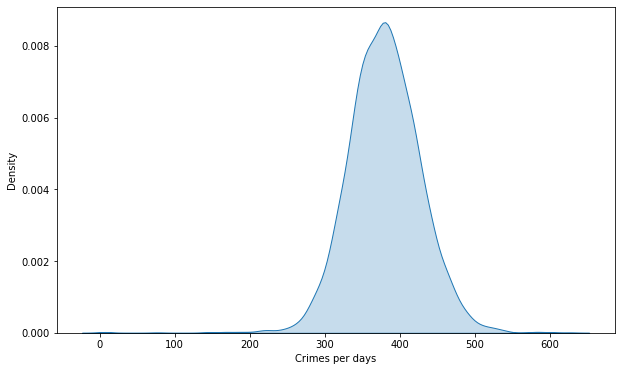

In [12]:
# density of crimes pr day
col = sns.color_palette()

df['Date'] = pd.to_datetime(df['date']).dt.date

plt.figure(figsize=(10, 6))
data = df.groupby('Date').count().iloc[:, 0]
sns.kdeplot(data=data, fill=True)
plt.xlabel('Crimes per days')
plt.ylabel('Density')
plt.savefig('dist_crime.png')
plt.show()

## Temporal variables

In [13]:
# create different time varibles
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month
df['day'] = pd.to_datetime(df['date']).dt.day
df['hour'] = pd.to_datetime(df['time'],format='%H:%M').dt.hour
df['minute'] = pd.to_datetime(df['time'],format='%H:%M').dt.minute
df['tmp'] = 1
#df.isnull().sum()

Text(0.5, 0, 'Years')

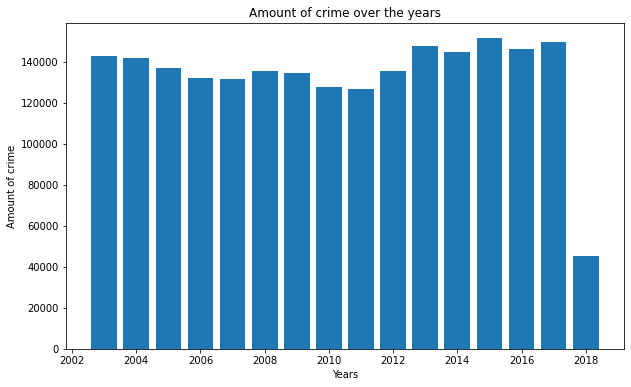

In [14]:
# plot number of crimes over time (year)
fig, ax = plt.subplots(figsize=(10,6))
count = Counter(df['year'])
ax.bar(count.keys(), count.values())
ax.set_title('Amount of crime over the years')
ax.set_ylabel('Amount of crime')
ax.set_xlabel('Years')

In [15]:
# Check which month are present in year 2018
df.loc[df['year']==2018].groupby(['month'])['month'].count()

month
1    11665
2     9564
3    10354
4     9954
5     3518
Name: month, dtype: int64

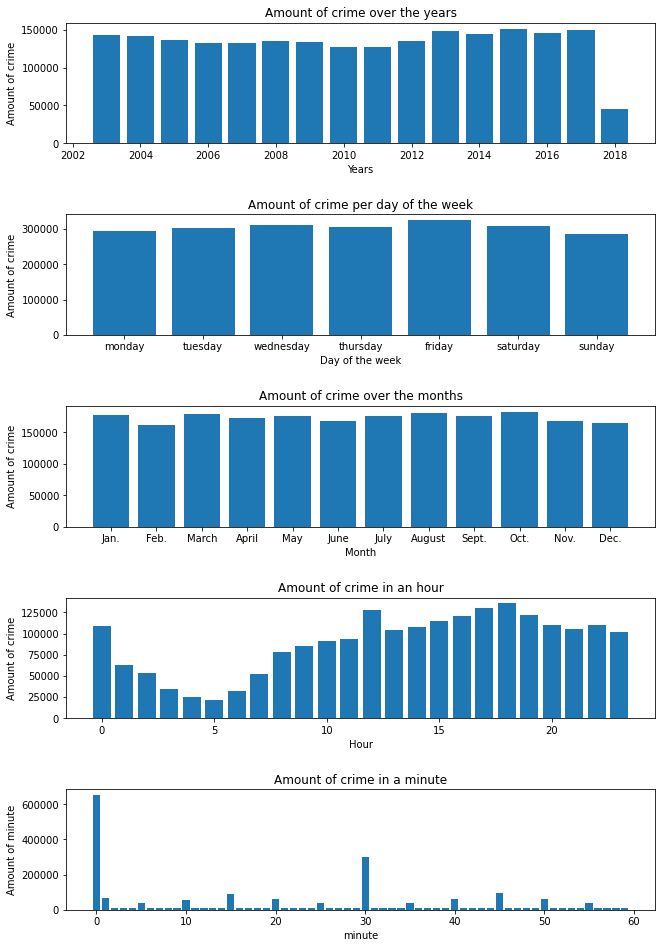

In [16]:
# plot number of crimes over all time varibles
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 14))
fig.tight_layout(pad=5.0)

count = Counter(df['year'])
ax1.bar(count.keys(), count.values())
ax1.set_title('Amount of crime over the years')
ax1.set_ylabel('Amount of crime')
ax1.set_xlabel('Years')

count = Counter(df['weekday'])
keyorder = ['monday', 'tuesday','wednesday', 'thursday','friday',  'saturday', 'sunday']
count={k: count[k] for k in keyorder if k in count}
ax2.bar(count.keys(), count.values())
ax2.set_title('Amount of crime per day of the week')
ax2.set_ylabel('Amount of crime')
ax2.set_xlabel('Day of the week')

count = Counter(df.loc[df['year']!=2018]['month']) # exclude year=18 as it is not a complete year
count = {k: count[k] for k in range(1,13) if k in count}
ax3.bar(['Jan.', 'Feb.', 'March', 'April', 'May', 'June', 'July', 'August','Sept.','Oct.','Nov.','Dec.'],count.values())
ax3.set_title('Amount of crime over the months')
ax3.set_ylabel('Amount of crime')
ax3.set_xlabel('Month')

count = Counter(df['hour'])
ax4.bar(count.keys(), count.values())
ax4.set_title('Amount of crime in an hour')
ax4.set_ylabel('Amount of crime')
ax4.set_xlabel('Hour')

count = Counter(df['minute'])
ax5.bar(count.keys(), count.values())
ax5.set_title('Amount of crime in a minute')
ax5.set_ylabel('Amount of minute')
ax5.set_xlabel('minute')
plt.savefig('time.png')
plt.show()


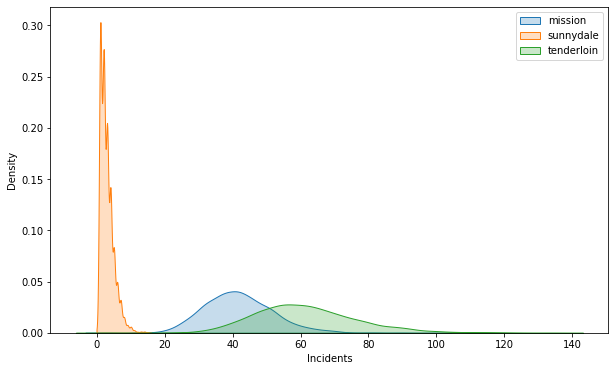

In [17]:
# density of crimes pr day
col = sns.color_palette()
plt.figure(figsize=(10, 6))
for dd in np.unique(df_districts.district):
    data1 = df.loc[df['district']==dd]
    data1 = data1.groupby('Date').count().iloc[:, 0]
    sns.kdeplot(data=data1, fill=True, label=dd)
plt.xlabel('Incidents')
plt.ylabel('Density')
plt.legend()
plt.savefig('D_dist_crime.png')
plt.show()

## Crime type varibales

C:\Users\sdoni\AppData\Local\Temp\ipykernel_18248\3443556163.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


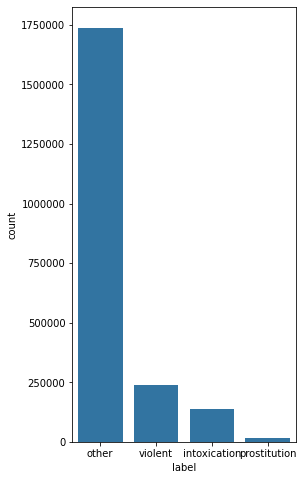

In [18]:
# crime label
fig, count = plt.subplots(figsize=(4,8))
count = sns.countplot(x=df['label'], order = df['label'].value_counts().index)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.savefig('label.png',bbox_inches='tight')
plt.show()

Text(0.5, 1.0, 'Crime counts')

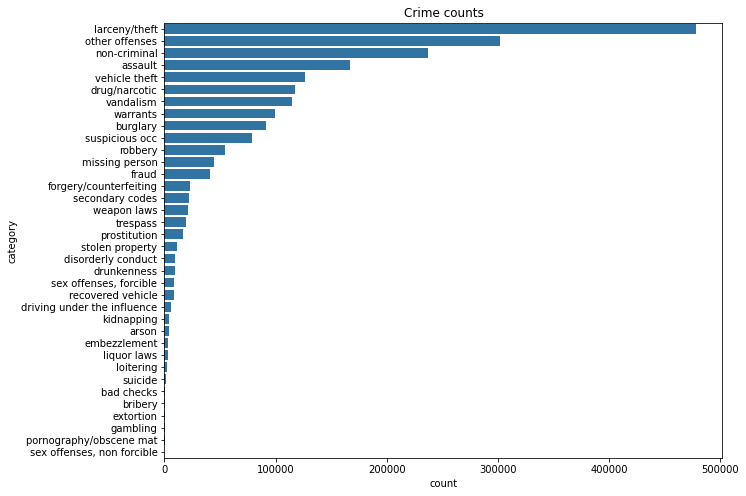

In [19]:
# crime category
fig, count = plt.subplots(figsize=(10,8))
count = sns.countplot(y=df['category'], order = df['category'].value_counts().index)
count.set_title('Crime counts')

[]

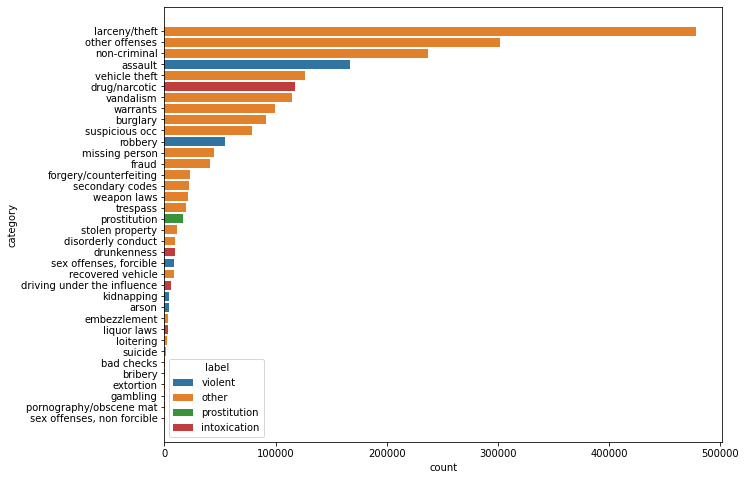

In [20]:
# crime label and crime category
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(y=df['category'],hue=df['label'],order = df['category'].value_counts().index)
#ax.set_title('Crime counts')
plt.savefig('label_category.png', bbox_inches='tight')
plt.plot()

## Resolution

C:\Users\sdoni\AppData\Local\Temp\ipykernel_18248\3504891552.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])


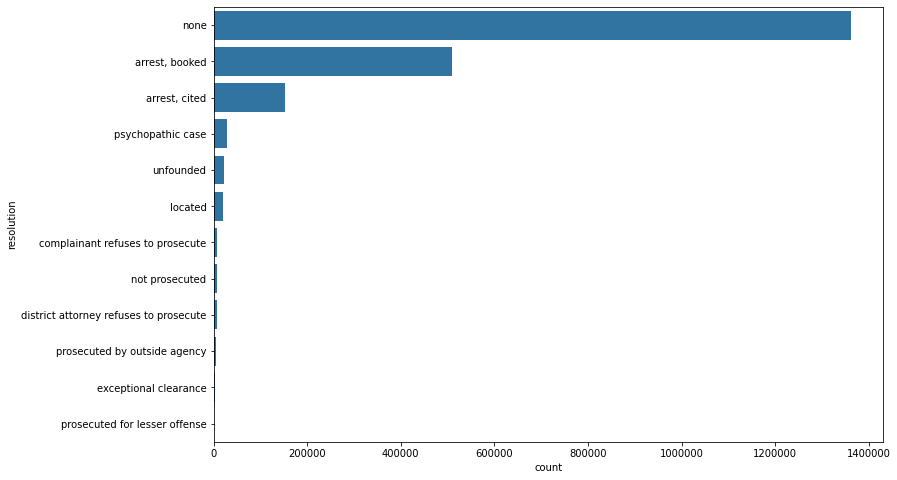

In [21]:
fig, count = plt.subplots(figsize=(12,8))
count = sns.countplot(y=df['resolution'], order = df['resolution'].value_counts().index)

current_values = plt.gca().get_xticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])

plt.savefig('resolution.png', bbox_inches='tight')
plt.show()

In [22]:
# make binary variable for resolution
df['outcome'] = 'resolved'
df.loc[df['resolution']=='none','outcome'] = 'none'

C:\Users\sdoni\AppData\Local\Temp\ipykernel_18248\2571402912.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])


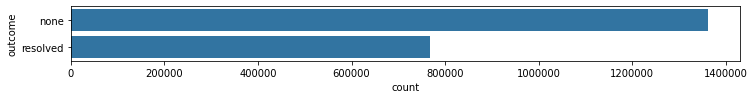

In [23]:
# plot binary variable for resolution
fig, count = plt.subplots(figsize=(12,1))
count = sns.countplot(y=df['outcome'], order = df['outcome'].value_counts().index)
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])
plt.savefig('outcome.png', bbox_inches='tight')
plt.show()

## Location: lon/lat and district

In [ ]:
# crime dist. in districts
df.groupby(['district']).size()/len(df)*100

C:\Users\sdoni\AppData\Local\Temp\ipykernel_18248\3701208956.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('map_distrits.png',bbox_inches='tight')
C:\Users\sdoni\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


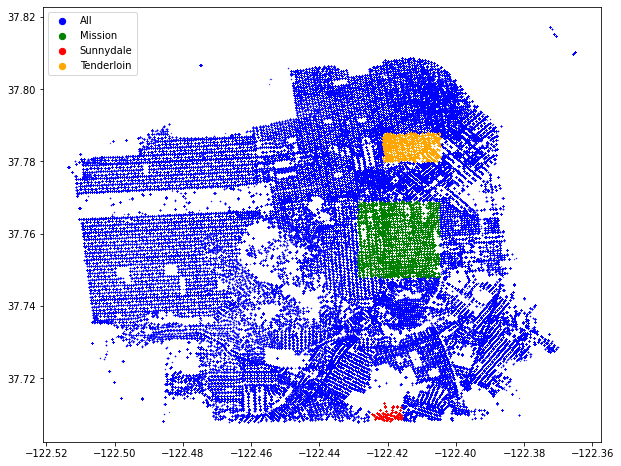

In [24]:
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(df.loc[df['district']=='other']['longitude'],df.loc[df['district']=='other']['latitude'], color='blue',s=0.1,label='All')
plt.scatter(df.loc[df['district']=='mission']['longitude'],df.loc[df['district']=='mission']['latitude'],color='green',s=0.1,label='Mission')
plt.scatter(df.loc[df['district']=='sunnydale']['longitude'],df.loc[df['district']=='sunnydale']['latitude'],color='red',s=0.1,label='Sunnydale')
plt.scatter(df.loc[df['district']=='tenderloin']['longitude'],df.loc[df['district']=='tenderloin']['latitude'],color='orange',s=0.1,label='Tenderloin')
ax.legend(markerscale=20)
ax.grid(False)
plt.savefig('map_distrits.png',bbox_inches='tight')
plt.show()

#### lat/lon density for crime types

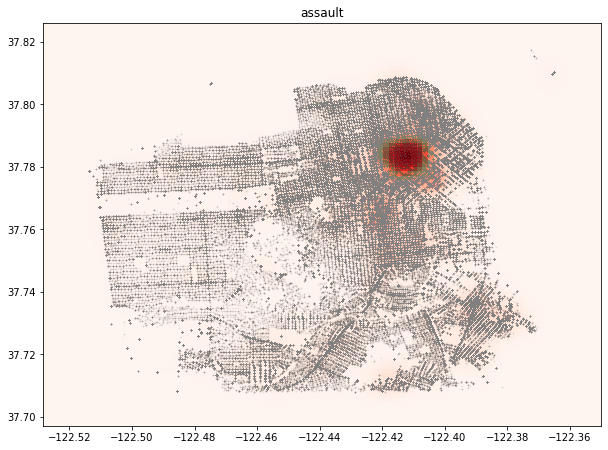

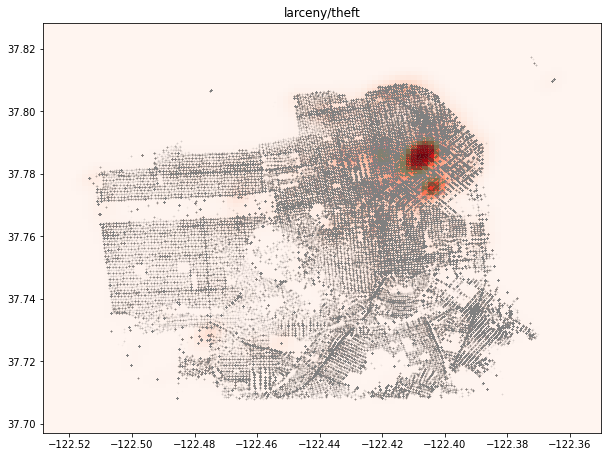

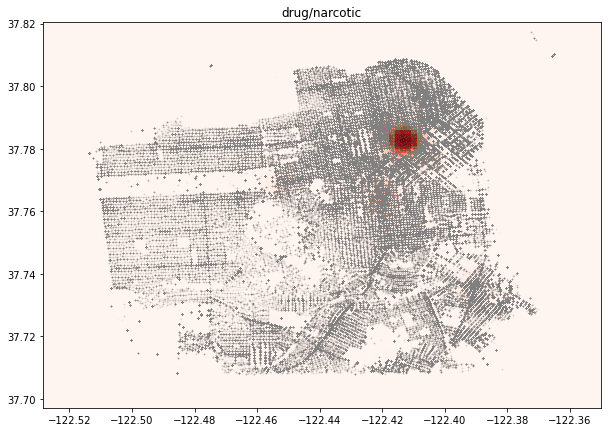

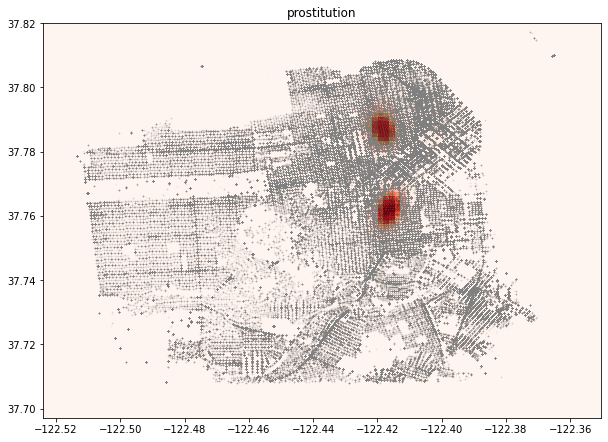

In [26]:
# Kernel density for most commen crime category in each label
c = 1
for cc in ['assault','larceny/theft','drug/narcotic','prostitution']:
    # extract data
    x = df.loc[df['category']==cc]['longitude']
    y = df.loc[df['category']==cc]['latitude']
    # Define the borders
    deltaX = (max(x) - min(x))/10
    deltaY = (max(y) - min(y))/10
    xmin = min(x) - deltaX
    xmax = max(x) + deltaX
    ymax = max(y) + deltaY
    # Create meshgrid
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

    # create kernel density
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = st.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)

    # plot
    fig = plt.figure(figsize=(10,8))
    plt.scatter(df['longitude'],df['latitude'], color='grey',s=1,alpha=.01, label='crimes')
    ax = fig.gca()
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.imshow(np.rot90(f), cmap='Reds', extent=[xmin, xmax, ymin, ymax])
    plt.title(cc)
    plt.savefig('Gauss_'+str(c)+'.png')
    plt.show()
    c= c + 1 

#### district vs. crime 

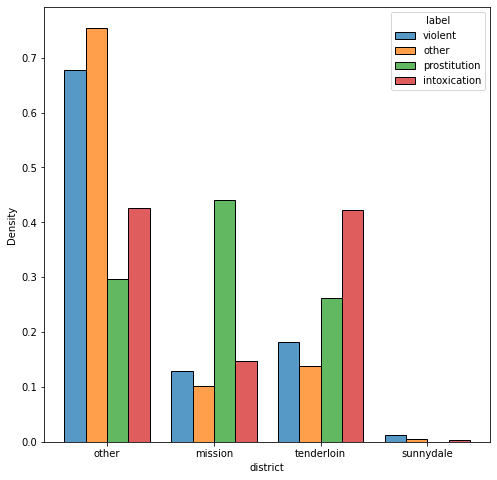

In [28]:
# distribution of crime label over districts
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.histplot(x = df['district'], hue=df['label'], multiple="dodge", 
                  stat = 'density', shrink = 0.8, common_norm=False,
                 )
plt.savefig('D_label.png',bbox_inches='tight')
plt.show()

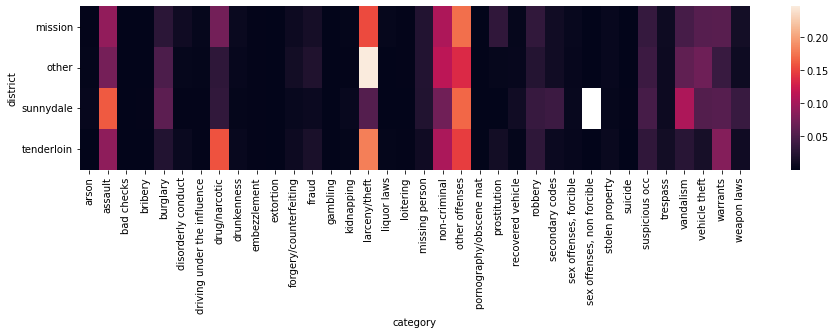

In [29]:
# distribution of crime type per district
df_pct = (df.groupby(['district','category'])['tmp'].count()/df.groupby(['district'])['tmp'].count())
fig, ax = plt.subplots(figsize=(15,3))
ax = sns.heatmap(df_pct.unstack())
ax.grid(False)
plt.savefig('D_cateogry_heatmap.png',bbox_inches='tight')
plt.show()

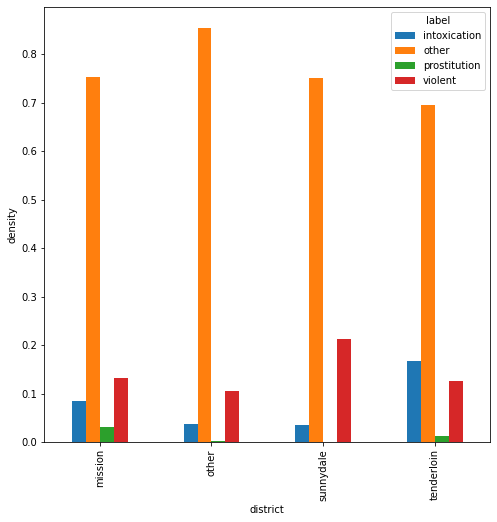

In [30]:
# distribution of crime label per district
df_pct = (df.groupby(['district','label'])['tmp'].count()/df.groupby(['district'])['tmp'].count())

#fig = plt.subplots(figsize=(8,8))
ax = df_pct.unstack().plot.bar(stacked=False,figsize=(8,8))
ax.set_ylabel("density")

plt.savefig('D_label1.png',bbox_inches='tight')
plt.show()

#### Resolution

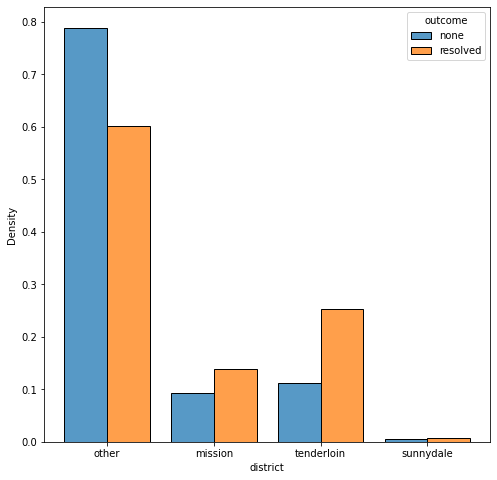

In [31]:
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.histplot(x = df['district'], hue=df['outcome'], multiple="dodge", 
                  stat = 'density', shrink = 0.8, common_norm=False)
#ax.set_title('Crime counts with decending')
plt.savefig('D_outcome.png',bbox_inches='tight')
plt.show()

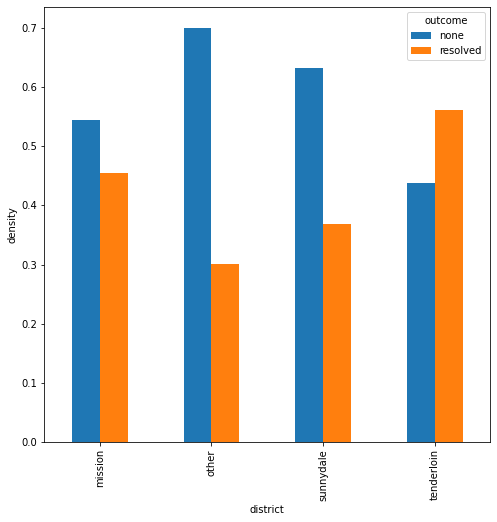

In [32]:
# distribution of binary outcome per district
df_pct = (df.groupby(['district','outcome'])['tmp'].count()/df.groupby(['district'])['tmp'].count())

#fig = plt.subplots(figsize=(8,8))
ax = df_pct.unstack().plot.bar(stacked=False,figsize=(8,8))
#ax.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left')
ax.set_ylabel("density")

plt.savefig('D_outcome1.png',bbox_inches='tight')
plt.show()

C:\Users\sdoni\AppData\Local\Temp\ipykernel_18248\1931881550.py:2: FutureWarning: The provided callable <function sum at 0x000001CB2BFE2670> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_heatmap = df.pivot_table(values='tmp',index='resolution',columns='label',aggfunc=np.sum)


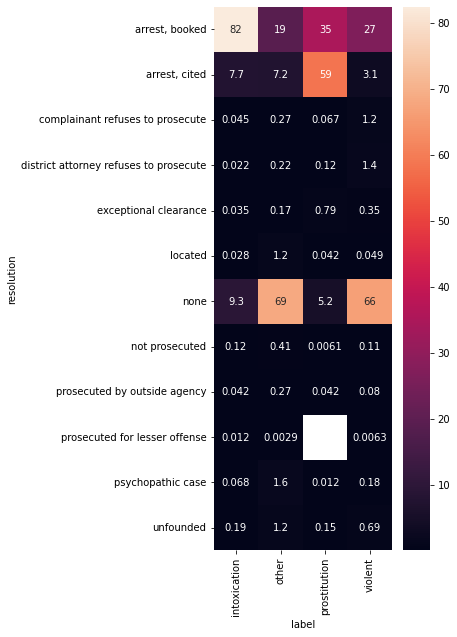

In [33]:
# resolution per crime type
df_heatmap = df.pivot_table(values='tmp',index='resolution',columns='label',aggfunc=np.sum)
for col in df_heatmap:
  df_heatmap[col] = (df_heatmap[col]/df_heatmap[col].sum()) * 100
fig, ax = plt.subplots(figsize=(4,10))
ax = sns.heatmap(df_heatmap,annot=True)
ax.grid(False)
plt.savefig('label_x_resolution_heatmap.png',bbox_inches='tight')
plt.show()

C:\Users\sdoni\AppData\Local\Temp\ipykernel_18248\2513087874.py:2: FutureWarning: The provided callable <function sum at 0x000001CB2BFE2670> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_heatmap = df.pivot_table(values='tmp',index='category',columns='resolution',aggfunc=np.sum)


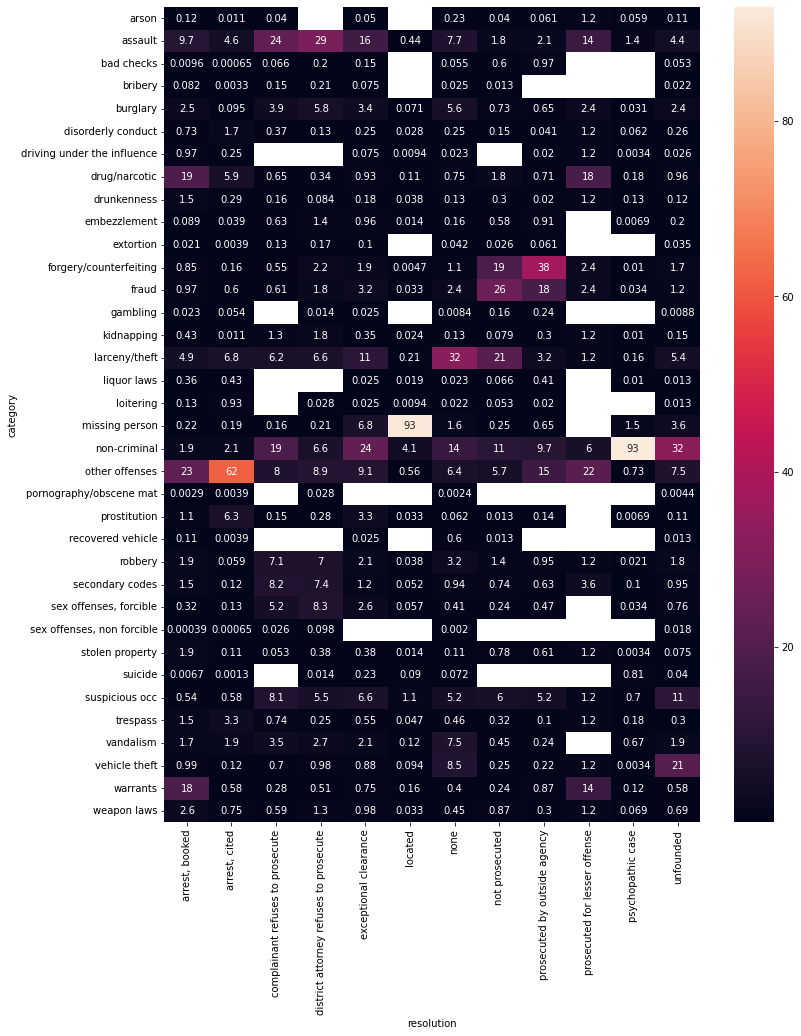

In [34]:
# resultion per crime category
df_heatmap = df.pivot_table(values='tmp',index='category',columns='resolution',aggfunc=np.sum)
for col in df_heatmap:
  df_heatmap[col] = (df_heatmap[col]/df_heatmap[col].sum()) * 100
fig, ax = plt.subplots(figsize=(12,15))
ax.grid(False)
ax = sns.heatmap(df_heatmap,annot=True)

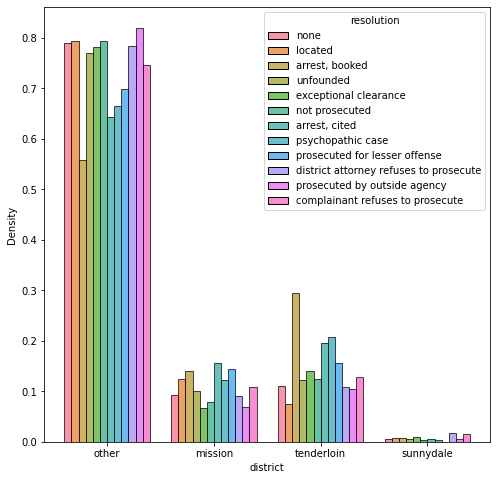

In [35]:
# distribution of resolution over district
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.histplot(x = df['district'], hue=df['resolution'], multiple="dodge", 
                  stat = 'density', shrink = 0.8, common_norm=False)
#ax.set_title('Crime counts with decending')
plt.savefig('D_resolution.png',bbox_inches='tight')

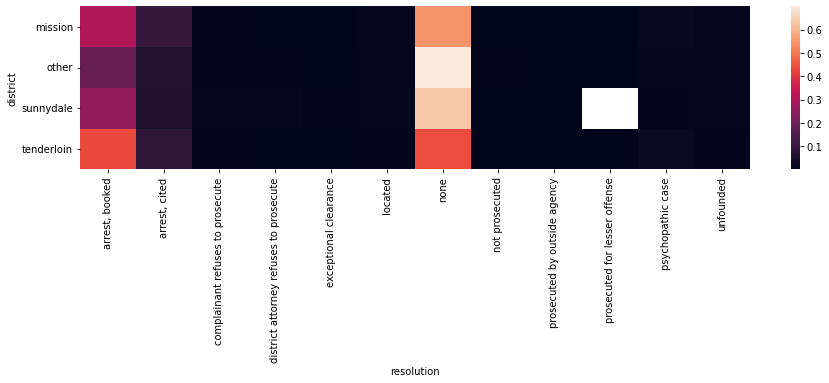

In [36]:
# distribution of resolution per district
df_pct = (df.groupby(['district','resolution'])['tmp'].count()/df.groupby(['district'])['tmp'].count())
fig, ax = plt.subplots(figsize=(15,3))
ax = sns.heatmap(df_pct.unstack())
ax.grid(False)
plt.savefig('D_resolution_heatmap.png',bbox_inches='tight')
plt.show()

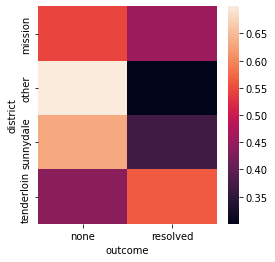

In [37]:
# distribution of (binary) resolution per district
df_pct = (df.groupby(['district','outcome'])['tmp'].count()/df.groupby(['district'])['tmp'].count())
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.heatmap(df_pct.unstack())
ax.grid(False)
plt.savefig('D_outcome_heatmap.png',bbox_inches='tight')
plt.show()

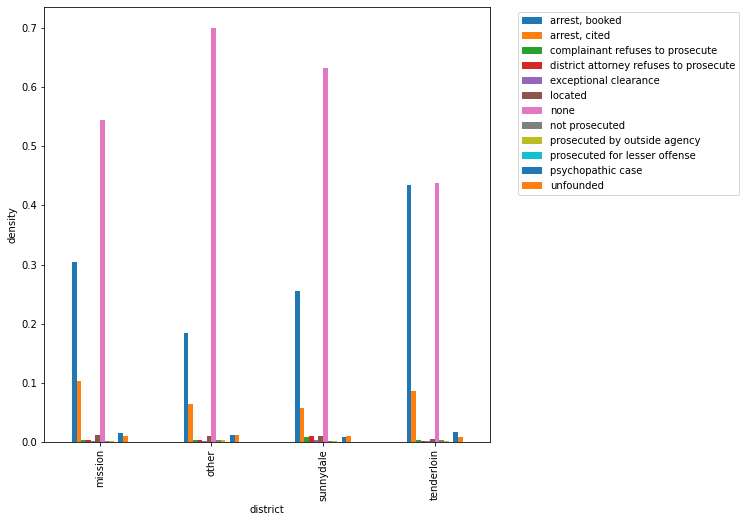

In [38]:
# distribution of resolution in each district
df_pct = (df.groupby(['district','resolution'])['tmp'].count()/df.groupby(['district'])['tmp'].count())

#fig = plt.subplots(figsize=(8,8))
ax = df_pct.unstack().plot.bar(stacked=False,figsize=(8,8))
ax.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left')
ax.set_ylabel("density")

plt.savefig('D_resolution1.png',bbox_inches='tight')
plt.show()

## Crimes over time per destrict

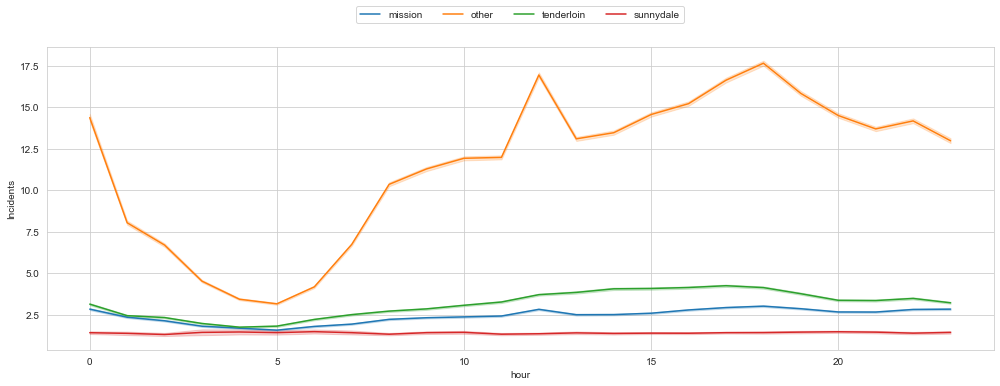

In [39]:
data = df.groupby(['hour', 'Date', 'district'],
                     as_index=False).count().iloc[:, :4]
data.rename(columns={'id': 'Incidents'}, inplace=True)
data.groupby(['hour', 'district'], as_index=False)
data = data.loc[data['district'].isin(
    ['mission', 'sunnydale', 'tenderloin','other'])]

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 6))
ax = sns.lineplot(x='hour', y='Incidents', data=data, hue='district')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=6)
#plt.suptitle('Average number of incidents per hour')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('D_hour1.png',bbox_inches='tight')
plt.show()

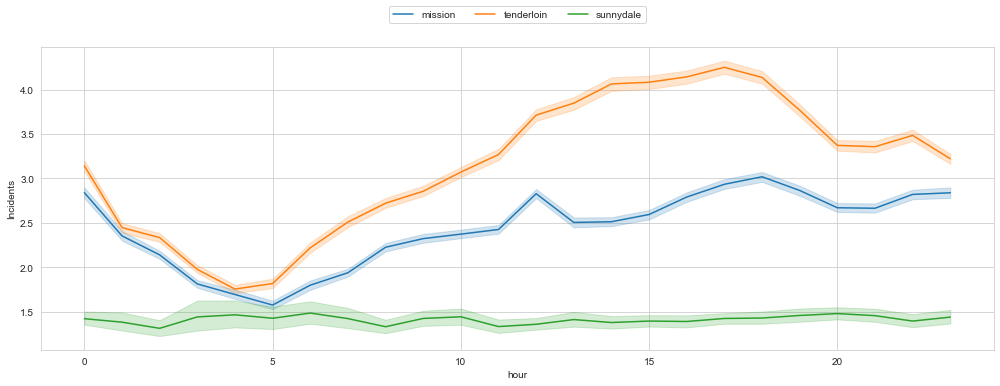

In [40]:
data = df.groupby(['hour', 'Date', 'district'],
                     as_index=False).count().iloc[:, :4]
data.rename(columns={'id': 'Incidents'}, inplace=True)
data.groupby(['hour', 'district'], as_index=False)
data = data.loc[data['district'].isin(
    ['mission', 'sunnydale', 'tenderloin'])]

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 6))
ax = sns.lineplot(x='hour', y='Incidents', data=data, hue='district')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=6)
#plt.suptitle('Average number of incidents per hour')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('D_hour.png',bbox_inches='tight')
plt.show()

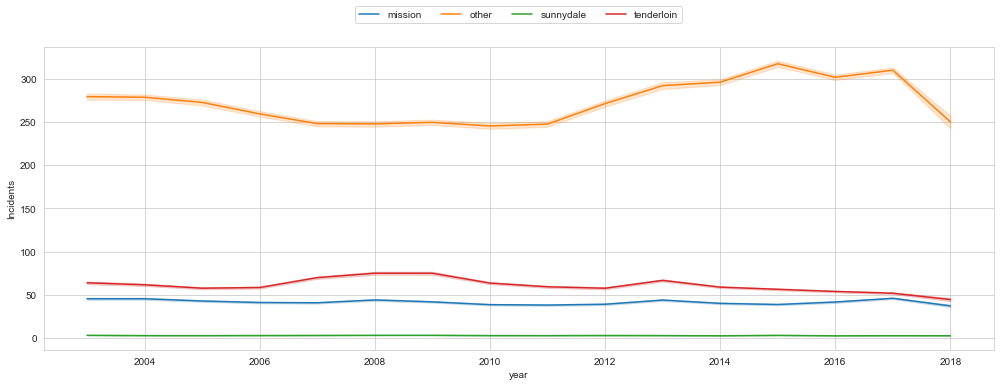

In [41]:
data = df.groupby(['year', 'Date', 'district'],
                     as_index=False).count().iloc[:, :4]
data.rename(columns={'id': 'Incidents'}, inplace=True)
data.groupby(['year', 'district'], as_index=False)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 6))
ax = sns.lineplot(x='year', y='Incidents', data=data, hue='district')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=6)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('D_year1.png',bbox_inches='tight')
plt.show()

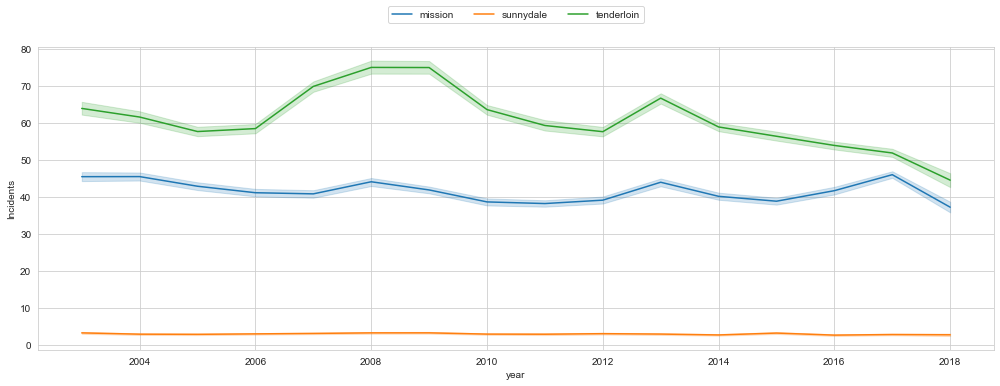

In [42]:
data = df.groupby(['year', 'Date', 'district'],
                     as_index=False).count().iloc[:, :4]
data.rename(columns={'id': 'Incidents'}, inplace=True)
data.groupby(['year', 'district'], as_index=False)
data = data.loc[data['district'].isin(
    ['mission', 'sunnydale', 'tenderloin'])]

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 6))
ax = sns.lineplot(x='year', y='Incidents', data=data, hue='district')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=6)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('D_year.png',bbox_inches='tight')
plt.show()

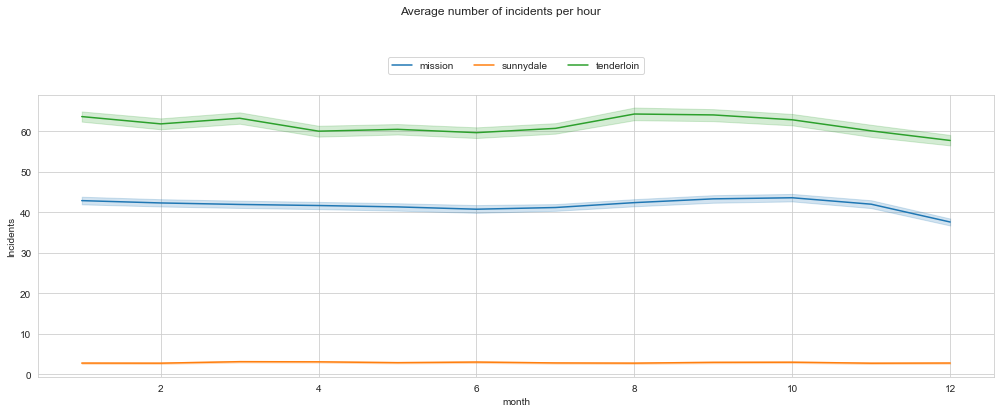

In [43]:
data = df.groupby(['month', 'Date', 'district'],
                     as_index=False).count().iloc[:, :4]
data.rename(columns={'id': 'Incidents'}, inplace=True)
data.groupby(['month', 'district'], as_index=False)
data = data.loc[data['district'].isin(
    ['mission', 'sunnydale', 'tenderloin'])]

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 6))
ax = sns.lineplot(x='month', y='Incidents', data=data, hue='district')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=6)
plt.suptitle('Average number of incidents per hour')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('D_year.png',bbox_inches='tight')
plt.show()

## Crime types over time

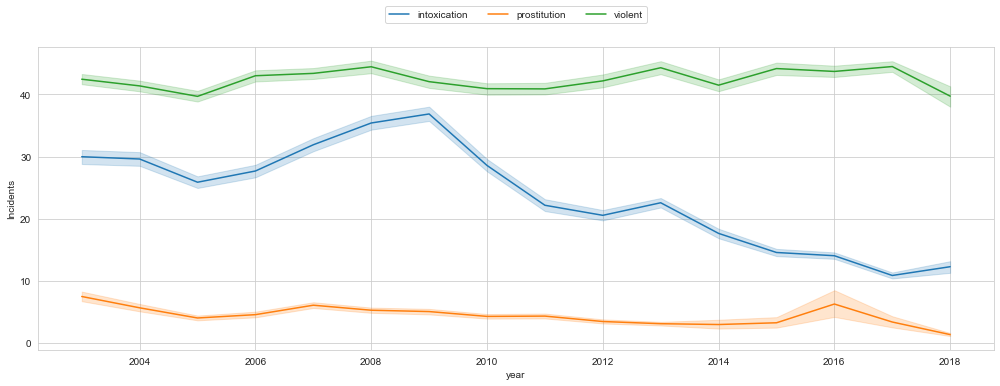

In [44]:
data = df.groupby(['year', 'Date', 'label'],
                     as_index=False).count().iloc[:, :4]
data.rename(columns={'id': 'Incidents'}, inplace=True)
data.groupby(['year', 'label'], as_index=False)
data = data.loc[data['label'].isin(
    ['prostitution', 'violent', 'intoxication'])]

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 6))
ax = sns.lineplot(x='year', y='Incidents', data=data, hue='label')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=6)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('label_x_year.png',bbox_inches='tight')
plt.show()

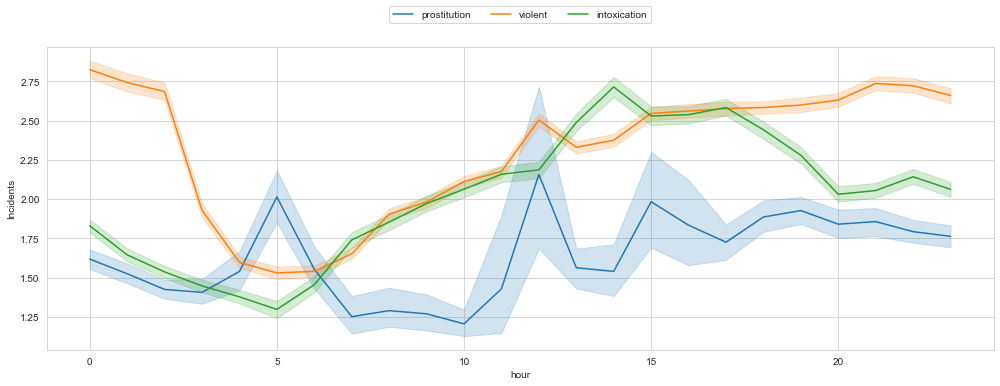

In [45]:
data = df.groupby(['hour', 'Date', 'label'],
                     as_index=False).count().iloc[:, :4]
data.rename(columns={'id': 'Incidents'}, inplace=True)
data.groupby(['hour', 'label'], as_index=False)
data = data.loc[data['label'].isin(
    ['prostitution', 'violent', 'intoxication'])]

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 6))
ax = sns.lineplot(x='hour', y='Incidents', data=data, hue='label')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=6)
#plt.suptitle('Average number of incidents per hour')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('label_x_hour.png',bbox_inches='tight')
plt.show()

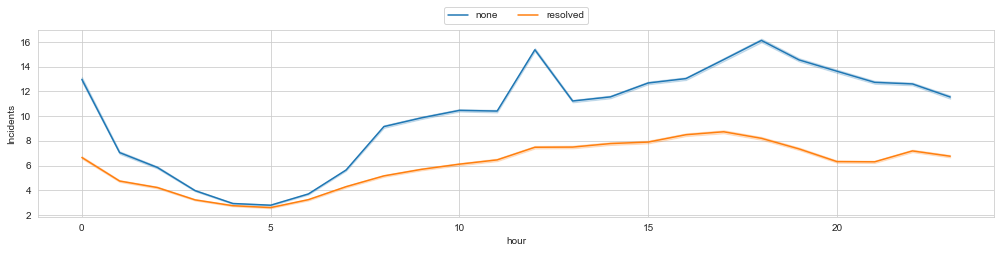

In [46]:
data = df.groupby(['hour', 'Date', 'outcome'],
                     as_index=False).count().iloc[:, :4]
data.rename(columns={'id': 'Incidents'}, inplace=True)
data.groupby(['hour', 'outcome'], as_index=False)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 4))
ax = sns.lineplot(x='hour', y='Incidents', data=data, hue='outcome')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=6)
#plt.suptitle('Average number of incidents per hour')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('resolution2_x_hour.png',bbox_inches='tight')
plt.show()

## Resolution over time

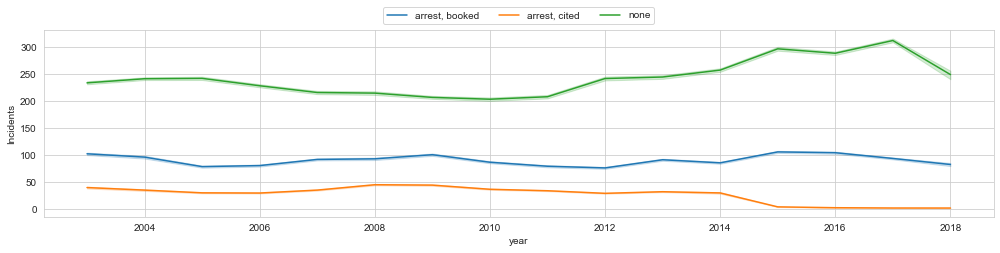

In [47]:
data = df.groupby(['year', 'Date', 'resolution'],
                     as_index=False).count().iloc[:, :4]
data.rename(columns={'id': 'Incidents'}, inplace=True)
data.groupby(['year', 'resolution'], as_index=False)
data = data.loc[data['resolution'].isin(
    ['none', 'arrest, booked', 'arrest, cited'])]

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 4))
ax = sns.lineplot(x='year', y='Incidents', data=data, hue='resolution')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=6)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('resolution_x_year.png',bbox_inches='tight')
plt.show()

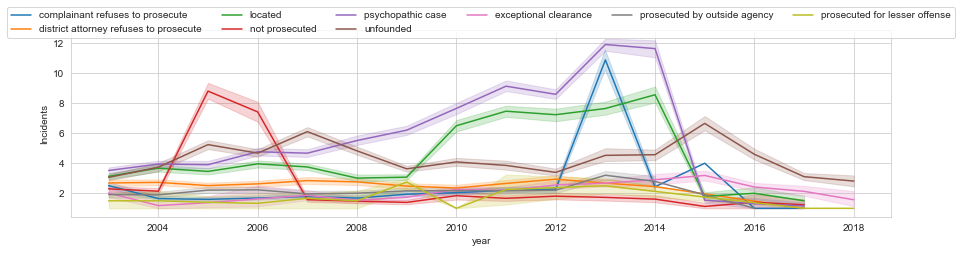

In [48]:
data = df.groupby(['year', 'Date', 'resolution'],
                     as_index=False).count().iloc[:, :4]
data.rename(columns={'id': 'Incidents'}, inplace=True)
data.groupby(['year', 'resolution'], as_index=False)
data = data.loc[~data['resolution'].isin(
    #['arson', 'assault', 'fraud'])]
    ['none', 'arrest, booked', 'arrest, cited'])]

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 4))
ax = sns.lineplot(x='year', y='Incidents', data=data, hue='resolution')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=6)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('resolution1_x_year.png',bbox_inches='tight')
plt.show()

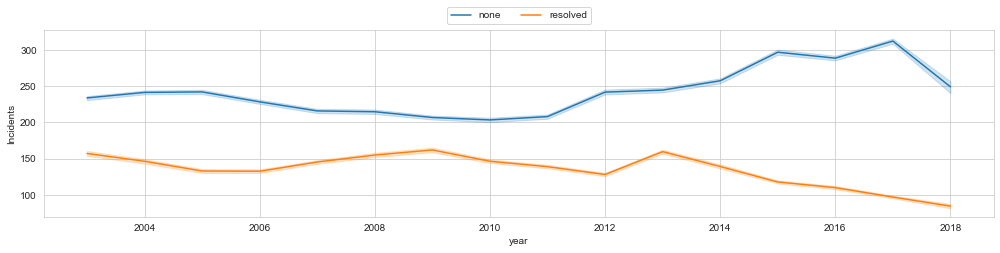

In [49]:
data = df.groupby(['year', 'Date', 'outcome'],
                     as_index=False).count().iloc[:, :4]
data.rename(columns={'id': 'Incidents'}, inplace=True)
data.groupby(['year', 'outcome'], as_index=False)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 4))
ax = sns.lineplot(x='year', y='Incidents', data=data, hue='outcome')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=6)
#plt.suptitle('Average number of incidents per hour')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('resolution2_x_year.png',bbox_inches='tight')
plt.show()

## Resolution x hour

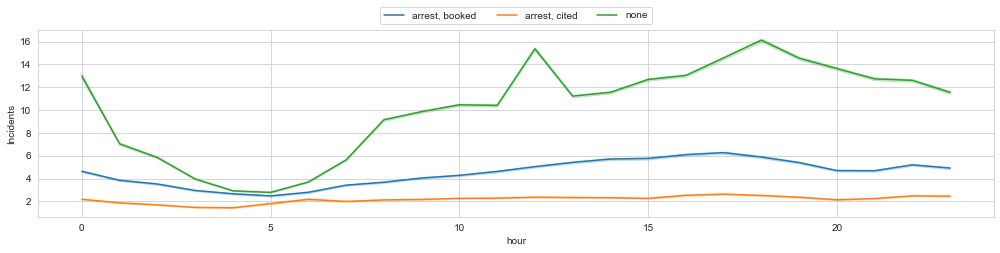

In [50]:
#data = df.groupby(['hour', 'Date', 'category'],
#                     as_index=False).count().iloc[:, :4]
#data.rename(columns={'Date': 'Incidents'}, inplace=True)
#data = data.groupby(['hour', 'category'], as_index=False).mean()
data = df.groupby(['hour', 'Date', 'resolution'],
                     as_index=False).count().iloc[:, :4]
data.rename(columns={'id': 'Incidents'}, inplace=True)
data.groupby(['hour', 'resolution'], as_index=False)
data = data.loc[data['resolution'].isin(
    #['arson', 'assault', 'fraud'])]
    ['none', 'arrest, booked', 'arrest, cited'])]

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 4))
ax = sns.lineplot(x='hour', y='Incidents', data=data, hue='resolution')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=6)
#plt.suptitle('Average number of incidents per hour')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('resolution_x_hour.png',bbox_inches='tight')
plt.show()

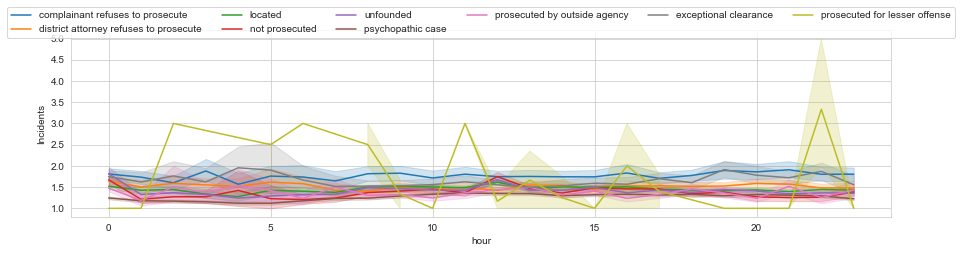

In [51]:
data = df.groupby(['hour', 'Date', 'resolution'],
                     as_index=False).count().iloc[:, :4]
data.rename(columns={'id': 'Incidents'}, inplace=True)
data.groupby(['hour', 'resolution'], as_index=False)
data = data.loc[~data['resolution'].isin(
    #['arson', 'assault', 'fraud'])]
    ['none', 'arrest, booked', 'arrest, cited'])]

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 4))
ax = sns.lineplot(x='hour', y='Incidents', data=data, hue='resolution')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=6)
#plt.suptitle('Average number of incidents per hour')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('resolution1_x_hour.png',bbox_inches='tight')
plt.show()

# Model: Predict Resolution

In [77]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix

In [53]:
# weekday: name -> number
mapping = {
    'monday': 1,
    'tuesday': 2,
    'wednesday': 3,
    'thursday':4,
    'friday':5,
    'saturday':6,
    'sunday': 7,
}
df['weekday_n'] = df['weekday'].replace(mapping)

C:\Users\sdoni\AppData\Local\Temp\ipykernel_18248\611219814.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['weekday_n'] = df['weekday'].replace(mapping)


In [54]:
# Sin and Cos transformation for day, hour and month, since they are cyclic
# Day
df['weekday_sin'] = np.sin(df.weekday_n*(2.*np.pi/7))
df['weekday_cos'] = np.cos(df.weekday_n*(2.*np.pi/7))
# Hour
df['hour_sin'] = np.sin(df.hour*(2.*np.pi/24))
df['hour_cos'] = np.cos(df.hour*(2.*np.pi/24))
# Month
df['month_sin'] = np.sin(df.month*(2.*np.pi/12))
df['month_cos'] = np.cos(df.month*(2.*np.pi/12))

In [55]:
# exclude data from 2014 and forward to avoid possible mislabeled outcomes (label-bias)
df1 = df.loc[df['year']<2014]
df1 = df1.copy()

In [56]:
# create binary outcome varibale
df1['y'] = 1
df1.loc[df['resolution']=='none', 'y'] = 0

In [57]:
# define columns to include and sepearete dependent and independent vars
X_cols = ['day','longitude','latitude','category','weekday_sin','weekday_cos','hour_sin','hour_cos','month_sin','month_cos',
          'district']
y_col = ['y']

X1 = df1[X_cols]
y = df1[y_col]

In [58]:
# create dummies for category
X = pd.get_dummies(X1,columns=['category'])
X = X.drop(['category_other offenses'], axis=1)

In [59]:
# split in train and test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42, 
                                                    stratify=pd.concat([X['district'], y], axis=1))

In [60]:
# remove district
X_train = X_train1.drop('district', axis=1)
X_test = X_test1.drop('district', axis=1)

In [61]:
## set up training pipeline
# parameter grid to search
parameters = {'clf__n_estimators': [50,100],
             'clf__learning_rate': [0.1,0.3],
             'clf__max_depth': [2,6,10]
             }
# classifier
xgb = XGBClassifier(objective='binary:logistic',
                    tree_method='hist',
                    random_state=42,
                    #n_thread=4,
                    #enable_categorical=True
                   )
# scale dat, lon and lat
preprocessor = ColumnTransformer(
    transformers = [('scaler', StandardScaler(),
                     ['day','longitude','latitude'])],
    remainder = 'passthrough')
pipeline = Pipeline([(
    'preprocessor', preprocessor),
    ('clf', xgb)])
# evaluation metrics
scorer = {'auc':'roc_auc',
         'recall': 'recall',
         'precision': 'precision',
         'ap': 'average_precision',
         'acc': 'accuracy'}
# 5 fold CV
cv = KFold(n_splits=5, random_state=1, shuffle=True)
grid_cv = GridSearchCV(pipeline,
                      parameters,
                      cv=cv,
                      return_train_score=True,
                      scoring = scorer,
                      refit = 'acc',
                      n_jobs = 5)

In [63]:
# train model
grid_cv.fit(X_train, y_train1)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         ['day',
                                                                          'longitude',
                                                                          'latitude'])])),
                                       ('clf',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                             

In [64]:
model = grid_cv.best_estimator_
params = grid_cv.best_params_
# grid_cv.cv_results_
print(params)

{'clf__learning_rate': 0.3, 'clf__max_depth': 10, 'clf__n_estimators': 100}


In [65]:
print(grid_cv.cv_results_['mean_train_auc'])
print(grid_cv.cv_results_['mean_test_auc'])

[0.83961779 0.85923794 0.87516086 0.88019313 0.89035996 0.89653332
 0.86446471 0.86968011 0.88268676 0.88890786 0.90169806 0.9154475 ]
[0.83958621 0.85916719 0.87442723 0.87892162 0.8853424  0.88788027
 0.864332   0.86951424 0.88067893 0.8850744  0.88832396 0.89059074]


In [67]:
print('Train accuracy: ', grid_cv.cv_results_['mean_train_acc'])
print('Test accuracy: ', grid_cv.cv_results_['mean_test_acc'])
print('Baseline: ', sum(y_train1['y'])/len(y_train1['y'])*100)

Train accuracy:  [0.71618304 0.80581669 0.81322015 0.81706898 0.82194089 0.82664383
 0.81018481 0.81241713 0.81871626 0.82237287 0.82987621 0.84037929]
Test accuracy:  [0.71618304 0.80575408 0.81300573 0.81605113 0.81887372 0.82135292
 0.81018481 0.81238845 0.8175177  0.82015436 0.82220389 0.82416379]
Baseline:  39.25155054504642


#### Feature importance

In [68]:
feat_imp = pd.Series(model.steps[1][1].feature_importances_,
                     index = X_train.columns).sort_values(ascending = True)

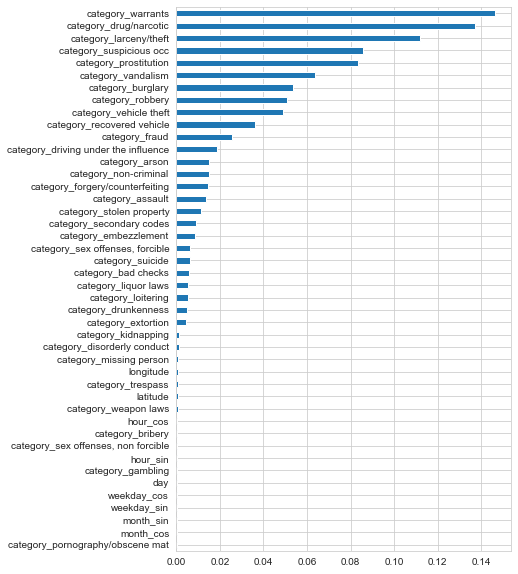

In [69]:
fig, ax = plt.subplots(figsize=(6,10))
ax = feat_imp.plot(kind='barh')
plt.savefig('m_feature_imp.png')
plt.show()

#### Test set performance

In [70]:
y_pred_test = model.predict(X_test)
y_pred_prob_test = model.predict_proba(X_test)

In [78]:
print(classification_report(y_test1, y_pred_test))
print(confusion_matrix(y_test1, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86    181325
           1       0.81      0.73      0.77    117159

    accuracy                           0.83    298484
   macro avg       0.82      0.81      0.81    298484
weighted avg       0.83      0.83      0.82    298484

[[160766  20559]
 [ 31349  85810]]


In [79]:
y_pred_prob_test#[:,1]

array([[0.48600388, 0.5139961 ],
       [0.4889483 , 0.5110517 ],
       [0.9623409 , 0.0376591 ],
       ...,
       [0.95715755, 0.04284246],
       [0.4467855 , 0.5532145 ],
       [0.73042476, 0.26957524]], dtype=float32)

In [81]:
fpr, tpr, thres = roc_curve(y_test1,y_pred_prob_test[:,1])
auc(fpr,tpr)

0.8924658217204726

In [83]:
accuracy_score(y_test1,y_pred_test)

0.826094531030139

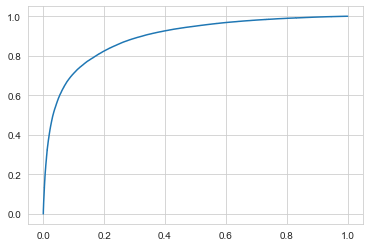

In [84]:
plt.plot(fpr,tpr)

#### Sensitivity anaysis on the three districts

In [85]:
for c in ['mission', 'tenderloin','sunnydale','other']:
    # get data for district
    X_test_d = X_test1.loc[X_test1['district']==c].drop('district', axis=1)
    y_test_d = y_test1.loc[X_test1['district']==c]
    # compute results
    y_pred_test_d = model.predict(X_test_d)
    y_pred_prob_test_d = model.predict_proba(X_test_d)
    fpr, tpr, thres = roc_curve(y_test_d,y_pred_prob_test_d[:,1])
    print('Test auc for', c,': ', auc(fpr,tpr))
    
    print('Test accuracy for ',c,': ', accuracy_score(y_test_d,y_pred_test_d))
    print('Baseline accuracy for ',c,': ',sum(y_test_d['y'])/len(y_test_d['y'])*100)
    
    print(confusion_matrix(y_test_d, y_pred_test_d))
    

Test auc for mission :  0.8977264504849898
Test accuracy for  mission :  0.8242609521548142
Baseline accuracy for  mission :  48.94633740947406
[[14808  2393]
 [ 3528 12963]]
Test auc for tenderloin :  0.8933443493442048
Test accuracy for  tenderloin :  0.8262819149964243
Baseline accuracy for  tenderloin :  61.16855756779219
[[16080  4011]
 [ 4977 26671]]
Test auc for sunnydale :  0.8326950006847167
Test accuracy for  sunnydale :  0.7719654647028948
Baseline accuracy for  sunnydale :  37.176231589639414
[[1070  167]
 [ 282  450]]
Test auc for other :  0.879057197776923
Test accuracy for  other :  0.8268461844573725
Baseline accuracy for  other :  32.35110193098482
[[128808  13988]
 [ 22562  45726]]
